The dataset I have chosen is Bank Marketing Data Set (url: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The dataset contains information about whether a client will subscribe to a term deposit or not. The dataset contains 16 feature variables and a target variable.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset, DataLoader


C:\Users\Eswara Sai Sumanth\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the dataset
df = pd.read_csv("bank-full.csv", sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# # Exploratory Data Analysis

In [6]:
#Checking for nulls
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

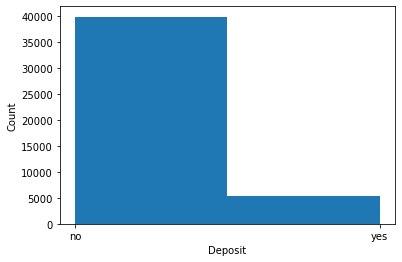

In [7]:
# Plotting the distribution of the target variable
plt.hist(df['y'], bins=2)
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.show()

<AxesSubplot:title={'center':'Marital status and deposit'}>

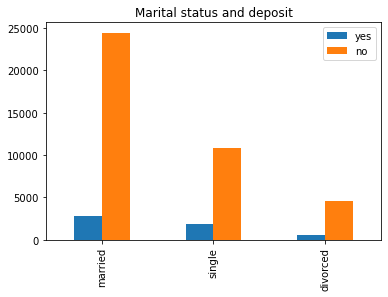

In [8]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Job and deposit'}>

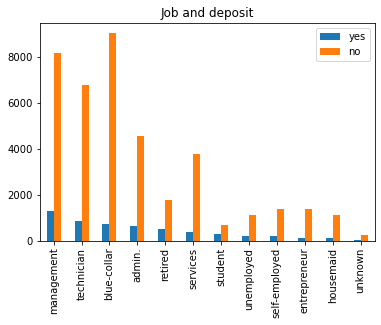

In [9]:
#Job and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

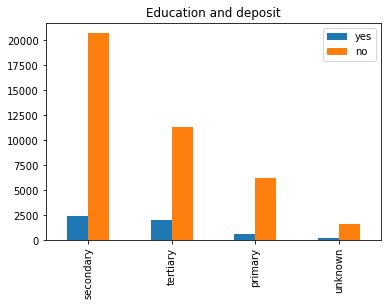

In [10]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

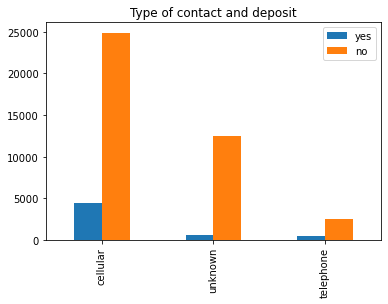

In [11]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

In [12]:
num_vars= ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cat_vars= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

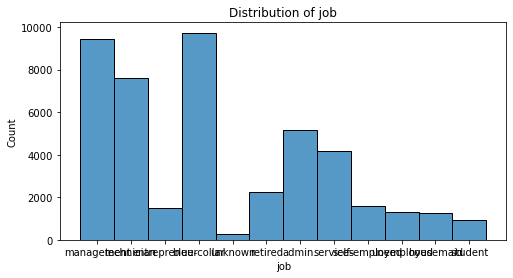

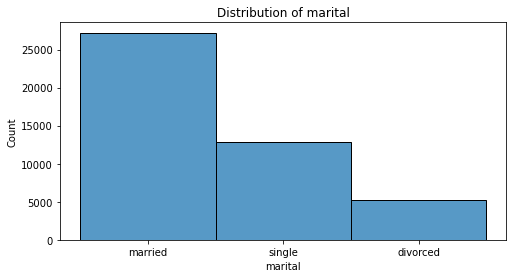

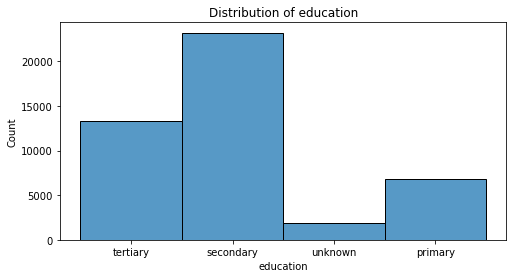

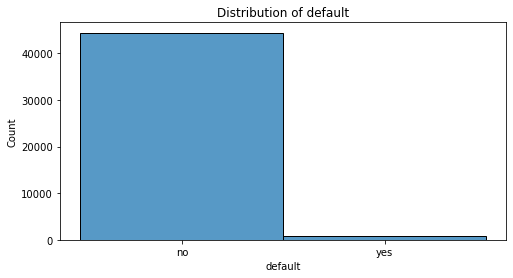

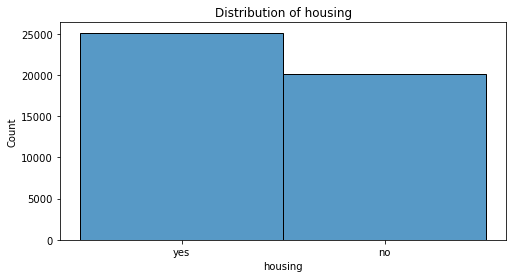

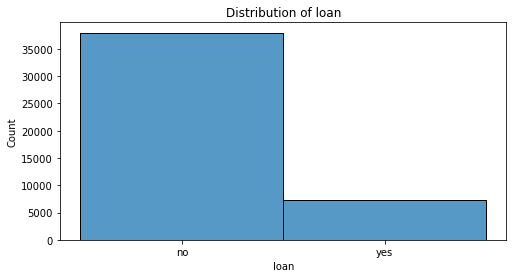

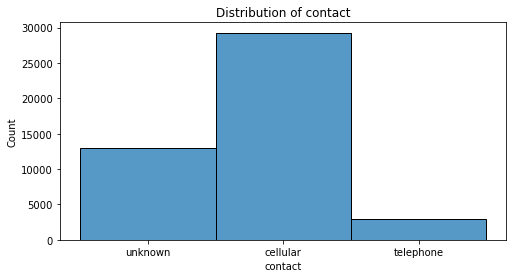

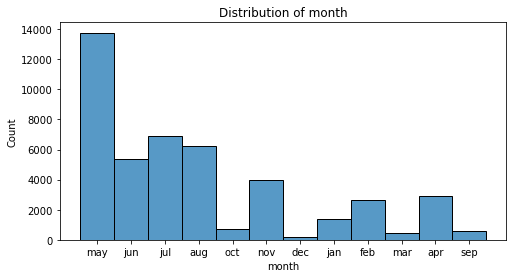

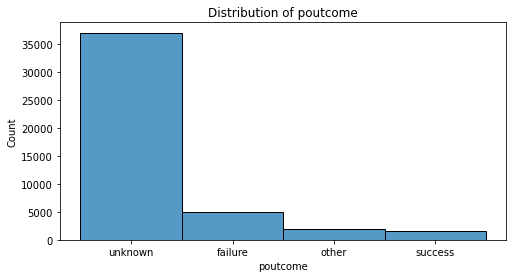

In [13]:
# Distribution of the categorical variables
for var in cat_vars:
        plt.figure(figsize=(8,4))
        sns.histplot(df[var], bins=30)
        plt.title(f"Distribution of {var}")
        plt.show()

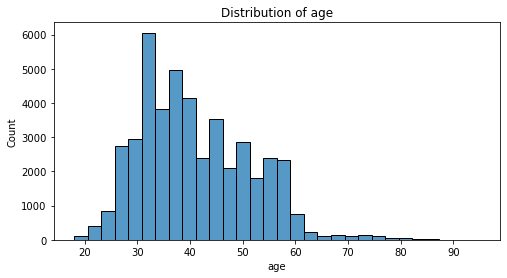

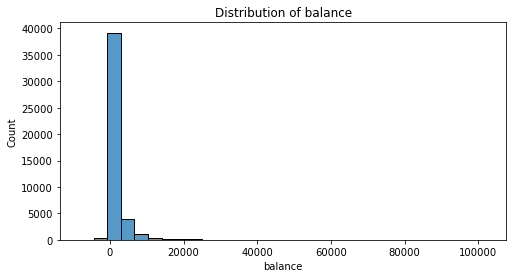

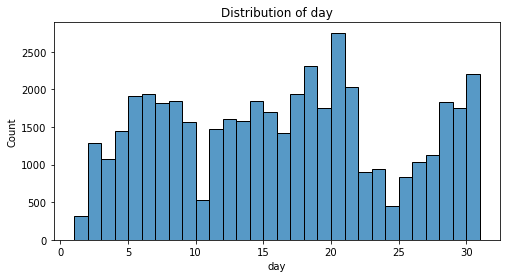

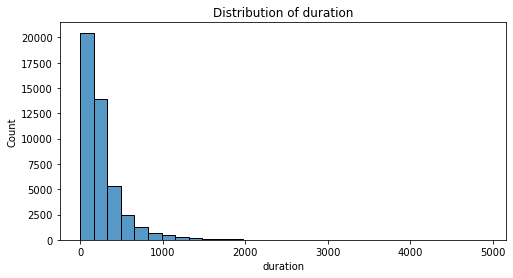

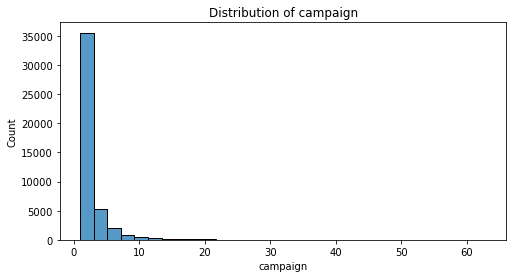

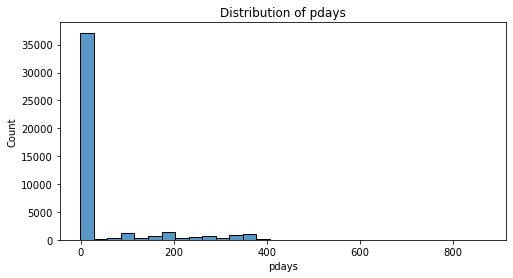

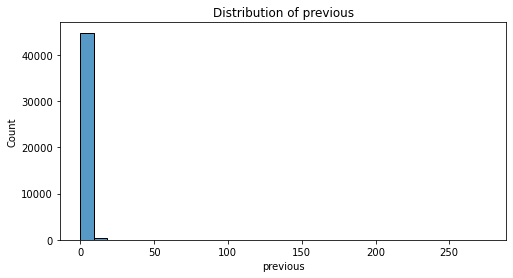

In [14]:
# Check the distribution of the numerical variables
for var in num_vars:
    plt.figure(figsize=(8,4))
    sns.histplot(df[var], bins=30)
    plt.title(f"Distribution of {var}")
    plt.show()

In [15]:
for col in cat_vars:
    print(df[col].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


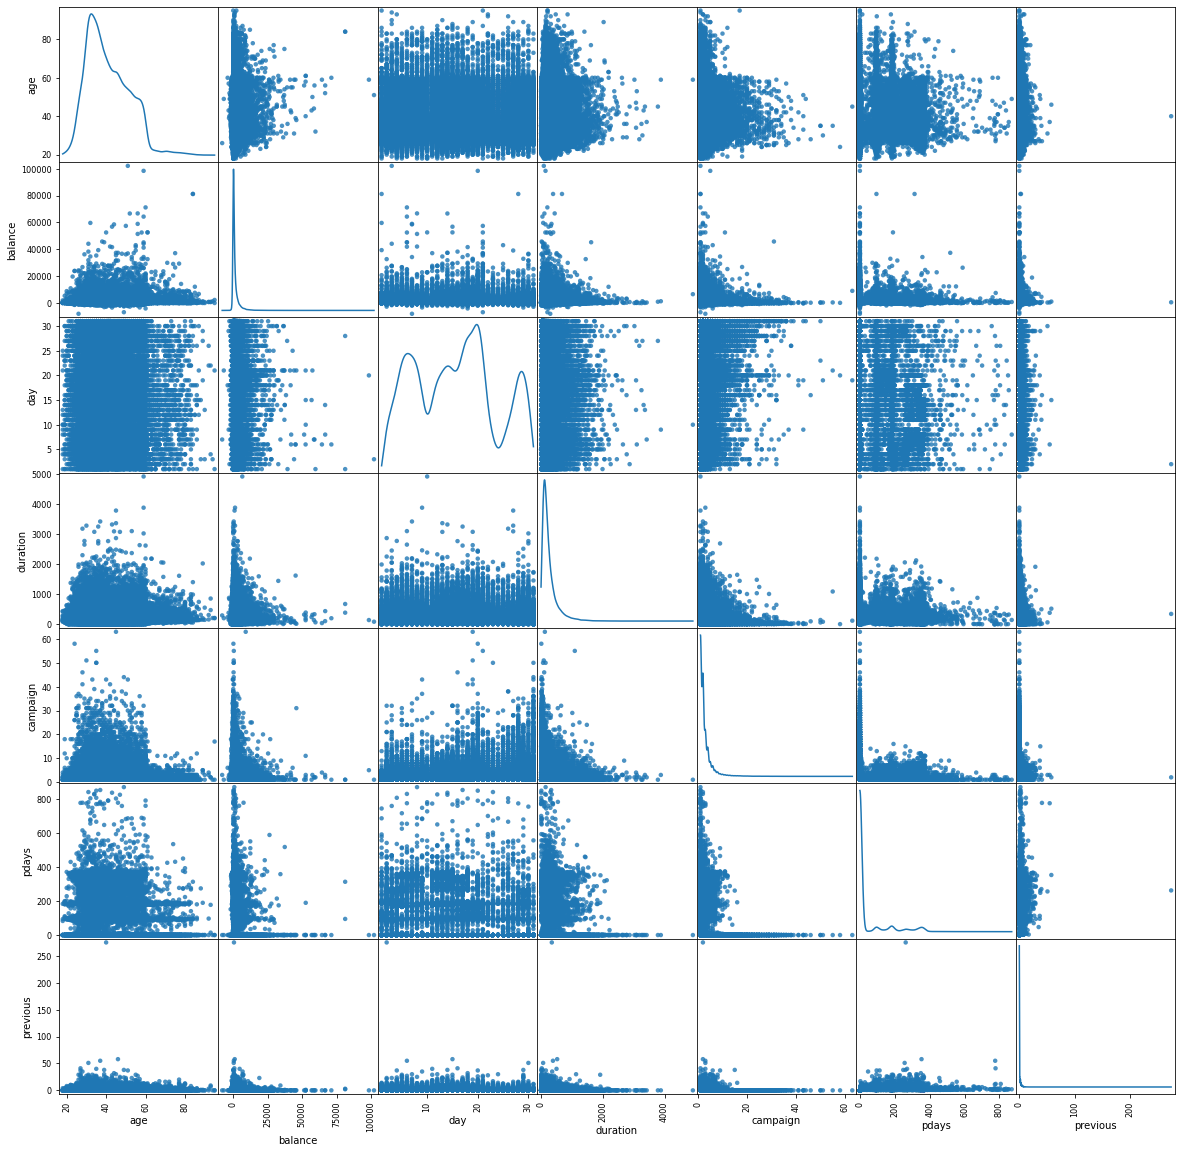

In [16]:
import matplotlib.pyplot as plt

grr = pd.plotting.scatter_matrix(df, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, diagonal='kde')
plt.show()

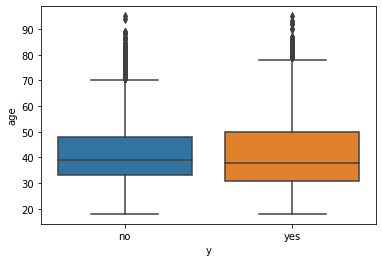

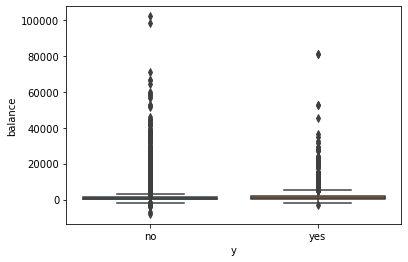

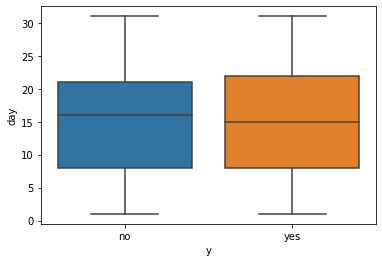

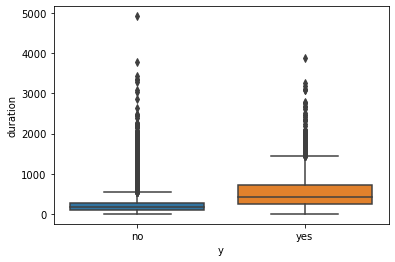

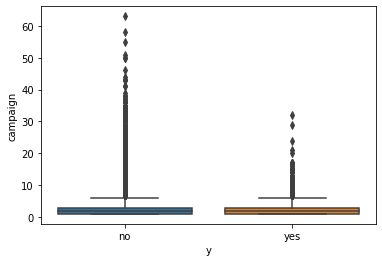

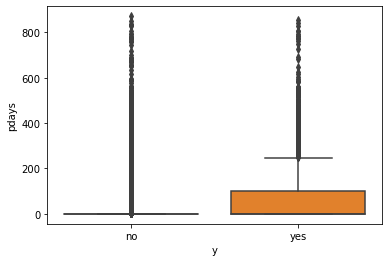

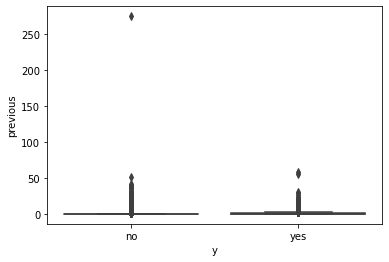

In [17]:
for var in num_vars:
    sns.boxplot(x="y", y=var, data=df)
    plt.show()

In [18]:
dummy_data=pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']], drop_first=True)

In [19]:
dummy_data.describe()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,...,0.294198,0.041074,0.018027,0.555838,0.160226,0.064276,0.287983,0.040698,0.033421,0.817478
std,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,...,0.455687,0.198464,0.133049,0.496878,0.366820,0.245247,0.452828,0.197592,0.179735,0.386278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
x=pd.concat([df[num_vars],dummy_data], axis=1)


In [21]:
x.skew(axis=0, skipna=True)

age                     0.684818
balance                 8.360308
day                     0.093079
duration                3.144318
campaign                4.898650
pdays                   2.615715
previous               41.846454
job_blue-collar         1.385652
job_entrepreneur        5.238320
job_housemaid           5.787133
job_management          1.429986
job_retired             4.125939
job_self-employed       5.066613
job_services            2.825851
job_student             6.724846
job_technician          1.775767
job_unemployed          5.632886
job_unknown            12.409644
marital_married        -0.416493
marital_single          0.964070
education_secondary    -0.052795
education_tertiary      0.903300
education_unknown       4.624988
default_yes             7.245375
housing_yes            -0.224766
loan_yes                1.852617
contact_telephone       3.553497
contact_unknown         0.936454
poutcome_other          4.649199
poutcome_success        5.192072
poutcome_u

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'job_blue-collar'}>,
        <AxesSubplot:title={'center':'job_entrepreneur'}>,
        <AxesSubplot:title={'center':'job_housemaid'}>,
        <AxesSubplot:title={'center':'job_management'}>,
        <AxesSubplot:title={'center':'job_retired'}>],
       [<AxesSubplot:title={'center':'job_self-employed'}>,
        <AxesSubplot:title={'center':'job_services'}>,
        <AxesSubplot:title={'center':'job_student'}>,
        <AxesSubplot:title={'center':'job_technician'}>,
        <AxesSubplot:title={'center':'job_unemployed'}>,
        <AxesSubplot:title={'center':'job_unknown'}>],
       [<AxesSubplot:title={'cent

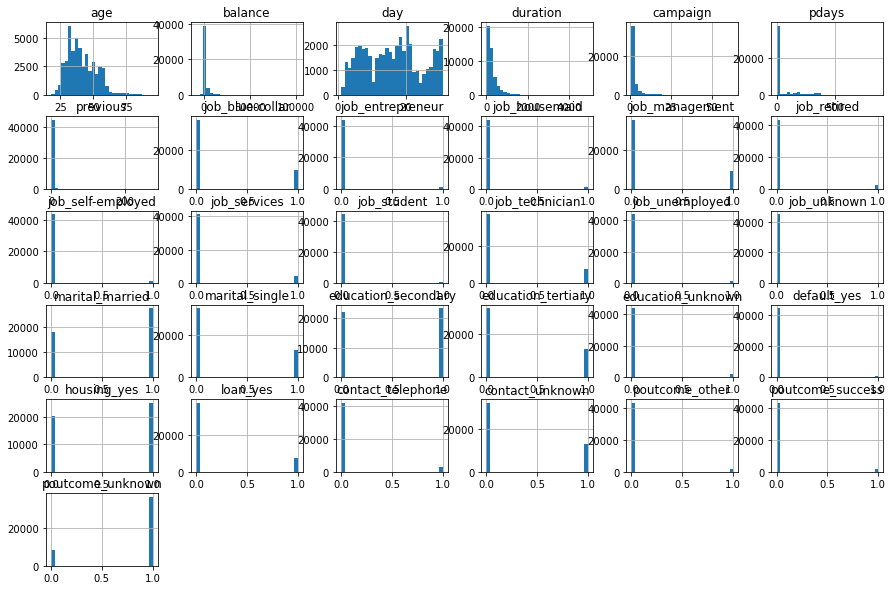

In [22]:
x.hist(bins=30, figsize=(15, 10))

In [23]:
x.corr()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.044002,0.021792,0.086650,...,-0.081629,0.069665,-0.017879,-0.185513,-0.015655,0.170349,-0.020132,-0.022967,0.035526,-0.000816
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.048757,0.009642,0.001661,...,0.084001,0.011181,-0.066745,-0.068768,-0.084350,0.037999,-0.037331,0.008466,0.035240,-0.030271
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.022898,-0.002312,0.003955,...,0.021730,0.000114,0.009424,-0.027982,0.011370,0.023652,-0.034103,-0.032952,-0.030321,0.086256
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.009637,-0.001327,-0.008046,...,0.000891,-0.000682,-0.010021,0.005075,-0.012412,-0.023201,-0.014379,-0.001958,0.042389,-0.003491
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.008986,0.002128,0.003097,...,0.012866,0.005704,0.016822,-0.023599,0.009980,0.053895,0.004853,-0.020107,-0.057486,0.107965
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.020063,-0.014203,-0.031350,...,-0.007568,-0.006907,-0.029979,0.124178,-0.022754,0.016006,-0.247068,0.389791,0.228539,-0.869962
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.017095,-0.008181,-0.015204,...,0.022888,-0.008257,-0.018329,0.037076,-0.011043,0.028097,-0.154162,0.306615,0.201424,-0.532763
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,1.000000,-0.096585,-0.087951,...,-0.320541,0.014715,0.010341,0.177475,0.018291,-0.003190,0.138141,0.001342,-0.053074,0.022194
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.096585,1.000000,-0.030969,...,0.067639,0.009325,0.026281,0.010600,0.039808,-0.004338,0.004867,-0.013506,-0.019111,0.014901
job_housemaid,0.086650,0.001661,0.003955,-0.008046,0.003097,-0.031350,-0.015204,-0.087951,-0.030969,1.000000,...,-0.057004,-0.004048,-0.000359,-0.079380,-0.017234,0.039371,-0.004815,-0.016769,-0.009375,0.026059


Analysis:

In the exploratory data analysis, we found that the dataset is imbalanced, with a much larger number of instances where customers did not subscribe to the term deposit-only 11.7% of the clients subscribing to a term deposit. We also discovered that clients with higher education levels, who have a housing loan, or those who have been contacted more than once during the campaign, are more likely to subscribe to a term deposit. 

We can also see that there are some features, such as job and marital status, that may be important for predicting whether or not a customer subscribes to the term deposit. Additionally, we can see that some numerical features, such as age and balance, have different distributions for customers who subscribed and those who did not, which may be useful for building a predictive model.

-Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
-Married customers are less likely to subscribe for term deposit.
-Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

In [24]:

y=df['y'].replace({'no': 0, 'yes': 1})
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val=train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
X_train.describe()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,...,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.922169,1372.101969,15.811131,257.749115,2.754977,39.982056,0.583720,0.214250,0.033151,0.026764,...,0.295067,0.040201,0.018165,0.553970,0.159616,0.064975,0.285971,0.040395,0.032764,0.818099
std,10.612148,3082.892182,8.319392,257.751281,3.090682,99.903540,2.418046,0.410307,0.179033,0.161395,...,0.456079,0.196434,0.133551,0.497086,0.366255,0.246484,0.451882,0.196886,0.178020,0.385768
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1433.000000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
classifier_list = [LogisticRegression(random_state=4),
                   RandomForestClassifier(),]

0.8251337421634991


C:\Users\Eswara Sai Sumanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


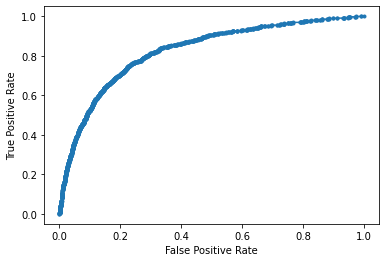

0.8962383616614443


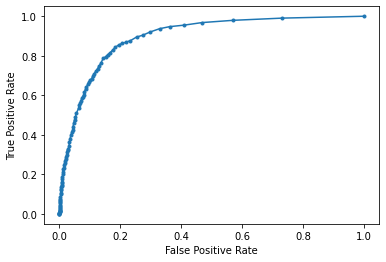

In [28]:
for clf in classifier_list:
    pipeline = Pipeline(steps=[('classifier', clf)])
    model_pipeline = pipeline.fit(X_train, y_train)
    preds = model_pipeline.predict_proba(X_val)
    print(roc_auc_score(y_val, preds[:,1]))
    lr_fpr, lr_tpr, _ = roc_curve(y_val, preds[:,1])
    plt.plot(lr_fpr, lr_tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [29]:
# NN


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_val_encoded= le.fit_transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)

model = Sequential()
model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train_one_hot.shape[1], activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val, y_val_one_hot))
test_loss, test_acc = model.evaluate(X_val, y_val_one_hot)

print('Accuracy of Deep Neural Network:', test_acc)

Epoch 1/10
1131/1131 [==============================] - 5s 3ms/step - loss: 10.1061 - accuracy: 0.8072 - val_loss: 0.3551 - val_accuracy: 0.8825
Epoch 2/10
1131/1131 [==============================] - 3s 3ms/step - loss: 0.4526 - accuracy: 0.8765 - val_loss: 0.3444 - val_accuracy: 0.8825
Epoch 3/10
1131/1131 [==============================] - 4s 3ms/step - loss: 0.3633 - accuracy: 0.8816 - val_loss: 0.3380 - val_accuracy: 0.8825
Epoch 4/10
1131/1131 [==============================] - 4s 3ms/step - loss: 0.3488 - accuracy: 0.8826 - val_loss: 0.3330 - val_accuracy: 0.8825
Epoch 5/10
1131/1131 [==============================] - 4s 3ms/step - loss: 0.3550 - accuracy: 0.8825 - val_loss: 0.3352 - val_accuracy: 0.8825
Epoch 6/10
1131/1131 [==============================] - 4s 3ms/step - loss: 0.3369 - accuracy: 0.8830 - val_loss: 0.3226 - val_accuracy: 0.8825
Epoch 7/10
1131/1131 [==============================] - 4s 3ms/step - loss: 0.3303 - accuracy: 0.8833 - val_loss: 0.3064 - val_accuracy

## Best Model


The best model accuracy is for the Random Forest model with accuracy of 89.62%

# Model Pitch

The objective is to predict whether a consumer would sign up for a term deposit based on multiple demographic and behavioral characteristics. We built a predictive model that will assist the bank in identifying consumers who are most likely to subscribe to the term deposit by using a logistic regression classifier, a tree-based classifier, and a deep neural network.

This predictive model will be beneficial to the bank since it will help them to more effectively focus their marketing efforts. Instead of contacting every client, they may concentrate their efforts on those who are most likely to sign up for the term deposit. This saves the bank time and resources while boosting the likelihood of a successful subscription. Furthermore, this model may also be utilized by other firms aiming to discover potential buyers for a certain product or service.